# Network science
### Magister en Data Science

#### Instituto Data Science, Universidad del Desarrollo

By Hernan Rivera 

* Basado en los notebooks del Profesor: PhD. Cristian Candia-Castro Vallejos.

### Barabasi-Albert y ajuste la ley de potencia

In [7]:
import numpy as np
import pandas as pd
import collections 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import powerlaw

In [2]:
%matplotlib inline

#### Distribucion de grados

In [3]:
ba = nx.barabasi_albert_graph(10000, 5, seed = None) 

In [4]:
N = len(ba)
L = ba.size()
degrees = list(dict(ba.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

In [5]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=50)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

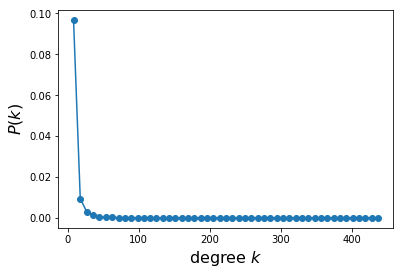

In [6]:
fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto meido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='-')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


# Muestra la gráfica
plt.show()

#### Ajsute con la ley de potencia

/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


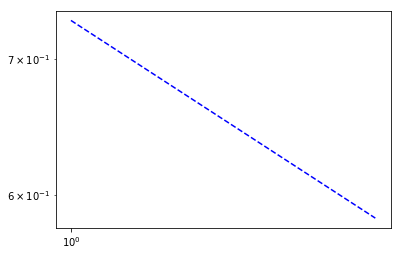

In [8]:
fit = powerlaw.Fit(np.array(density) + 1, xmin=1, discrete=True)
fit.power_law.plot_pdf(color='b', linestyle='--', label='fit ccdf')
fit.plot_pdf(color= 'b')